In [2]:
from EOF_manage import *
from basic_op_jup import *
from I_O_manage import *
from KMEAN_manage import *
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cdo import Cdo
import pandas as pd
import cartopy.crs as ccrs

cdo=Cdo()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [3]:
dataset_0, dataset_names = input_interface('I_O.json')
dataset = dataset_0.rolling(time=15, center=True).mean().dropna("time")

### Day of year serie

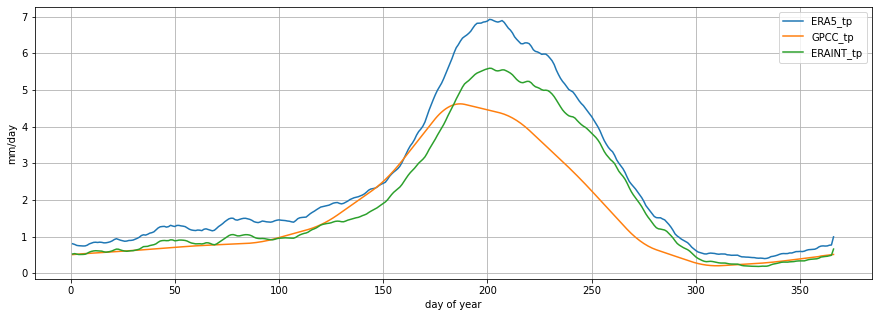

In [4]:
dataset_doy = dataset.groupby('time.dayofyear').mean().rename(dayofyear = 'time')

plt.figure(figsize = (15,5))

for i in range(len(dataset_names)):
    getattr(dataset_doy,dataset_names[i]).mean(['lat','lon']).plot(label = dataset_names[i])

plt.xlabel('day of year')
plt.ylabel('mm/day')
plt.grid()
plt.legend()

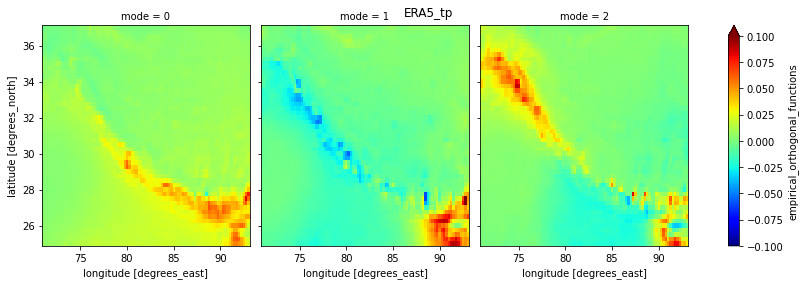

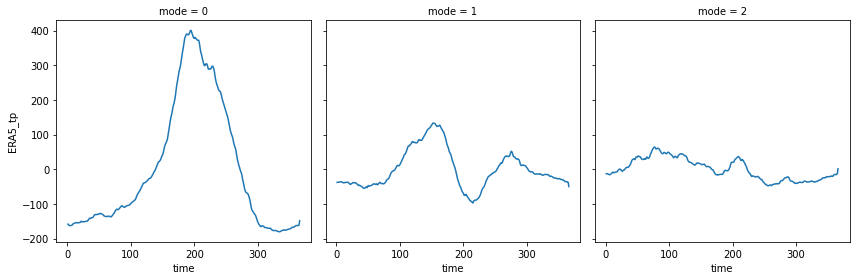

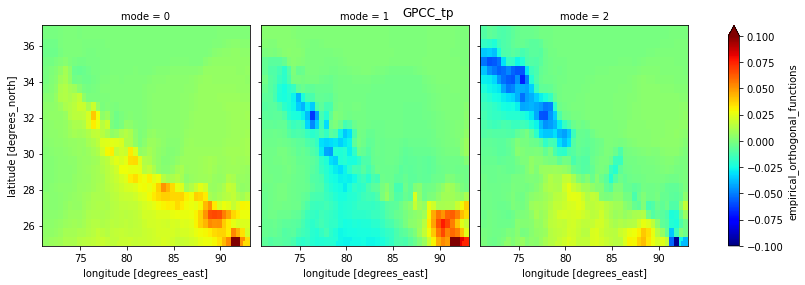

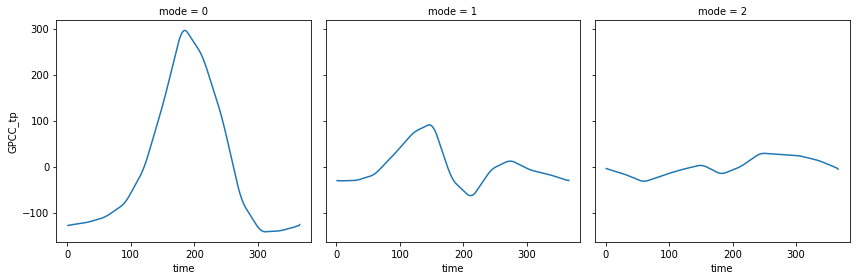

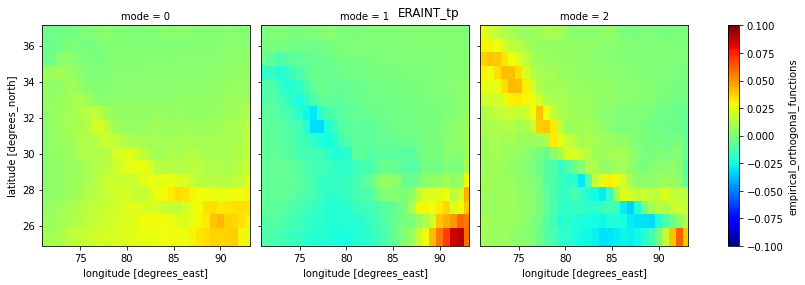

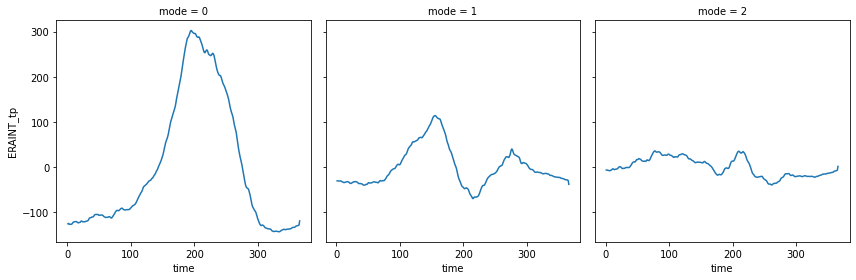

In [5]:
# Computing eofs and pcs for doy dataset
eof_database_doy, pc_database_doy, exp_databas_doy, solver_list_doy = eof_base_interface(dataset_doy, dataset_names, 'EOF.json') 

for i in range(len(dataset_names)):
    getattr(eof_database_doy,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3, vmin = -0.1, vmax = 0.1, cmap = 'jet')
    plt.suptitle(f'{dataset_names[i]}')
    getattr(pc_database_doy,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3)


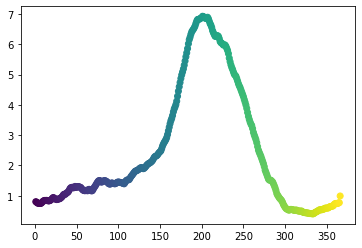

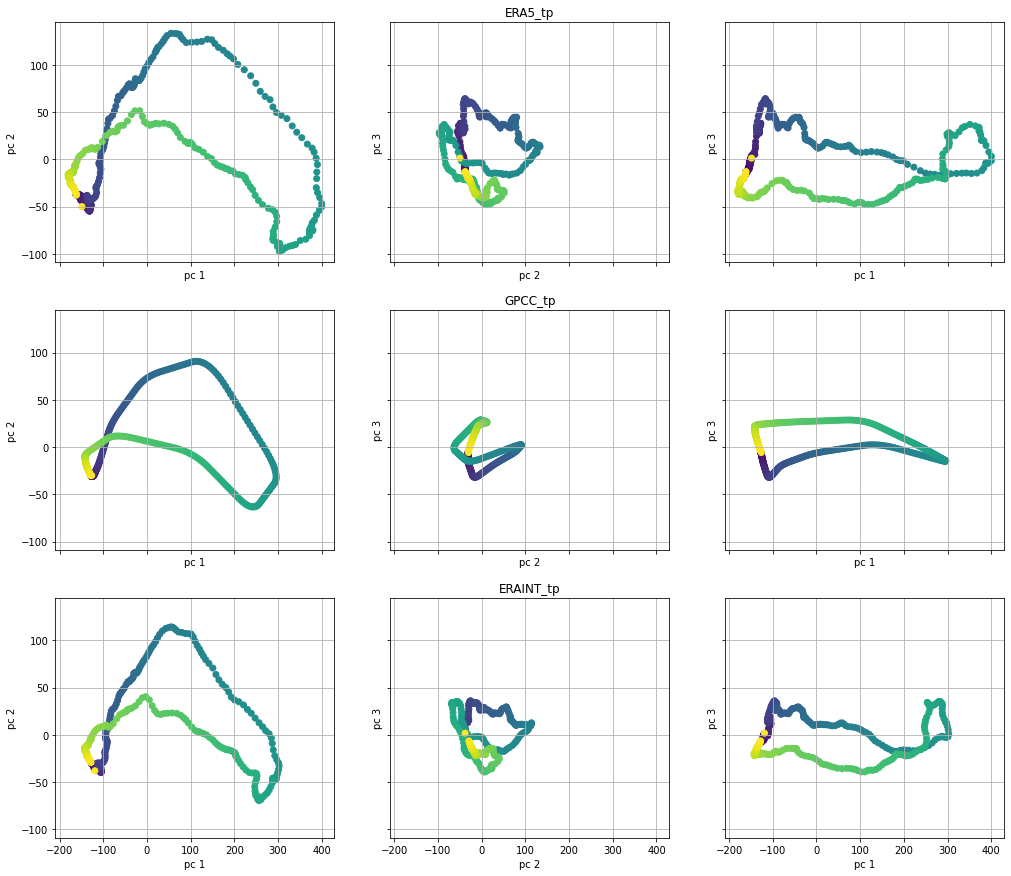

In [6]:
plt.scatter(dataset_doy.time, dataset_doy.ERA5_tp.mean(['lat','lon']), c = dataset_doy.time)  


fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 0) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 1) , c = pc_database_doy.time)
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 1) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 2), c = pc_database_doy.time)
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 0) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 2), c = pc_database_doy.time)
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()


    

### Daily serie

Focus on 1989 monsoon

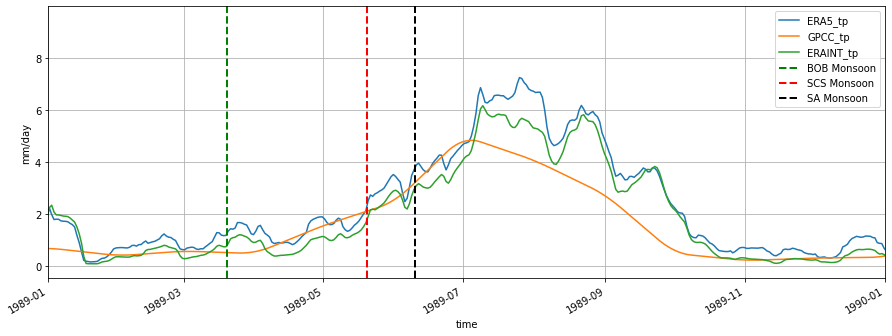

In [7]:
plt.figure(figsize = (15,5))

for i in range(len(dataset_names)):
    getattr(dataset,dataset_names[i]).mean(['lat','lon']).plot(label = dataset_names[i])

plt.xlabel('time')
plt.ylabel('mm/day')
plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1990-01-01'))
plt.axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
plt.grid()
plt.legend()

<Figure size 432x288 with 0 Axes>

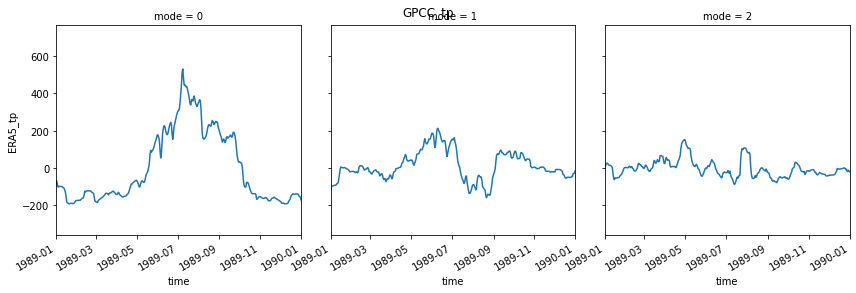

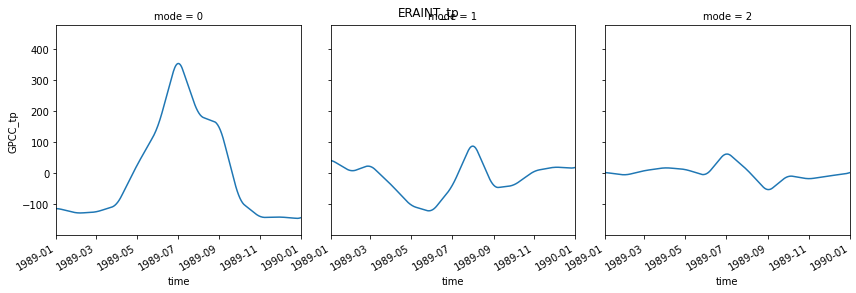

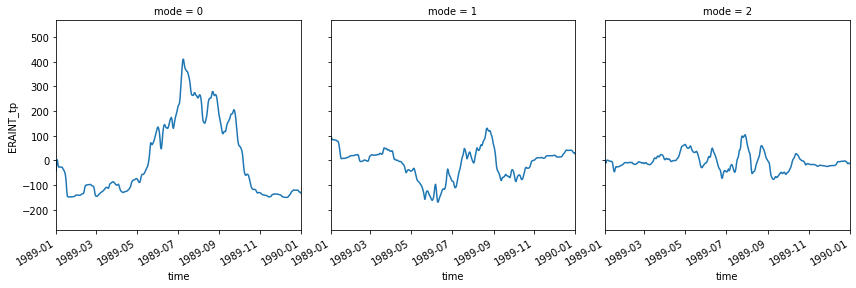

In [8]:
# Computing eofs and pcs for daily dataset
#pc_database = eof_proj_interface(solver_list_doy, dataset, dataset_names, 'EOF.json')
eof_database, pc_database, exp_databas, solver_list = eof_base_interface(dataset, dataset_names, 'EOF.json') 

for i in range(len(dataset_names)):
    plt.suptitle(f'{dataset_names[i]}')
    getattr(pc_database,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3)
    plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1990-01-01'))

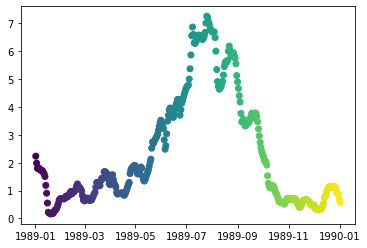

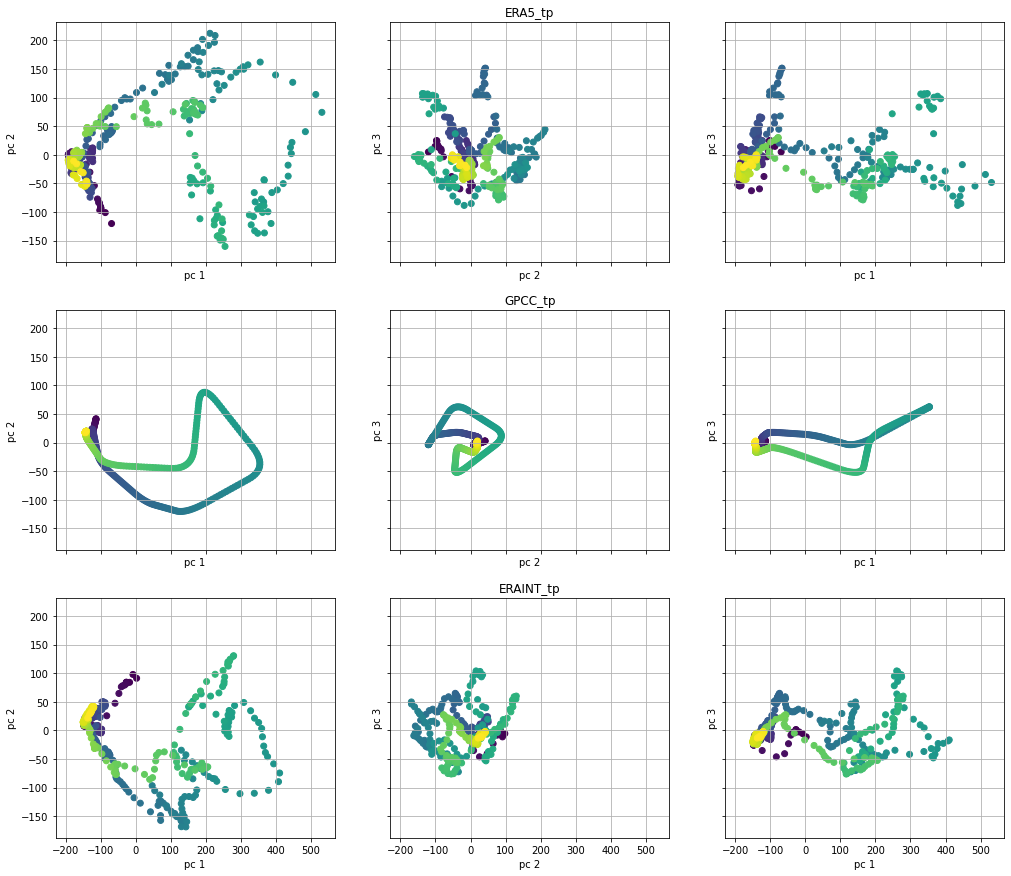

In [9]:
plot_set = pc_database.sel(time = slice('1989-01-01','1990-01-01'))
plot_setti = dataset.sel(time = slice('1989-01-01','1990-01-01'))
plt.scatter(plot_setti.time, plot_setti.ERA5_tp.mean(['lat','lon']), c = plot_setti.time)  

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 1), c = plot_set.time)
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 1) , getattr( plot_set,dataset_names[i]).sel(mode = 2), c = plot_set.time)
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 2), c = plot_set.time)
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()

In [19]:
n_season = 2

model_list, cc_database = kmean_models_dataset(pc_database, dataset_names, n_season, 300)
predict_database = kmean_prediction_dataset(pc_database, dataset_names, model_list)

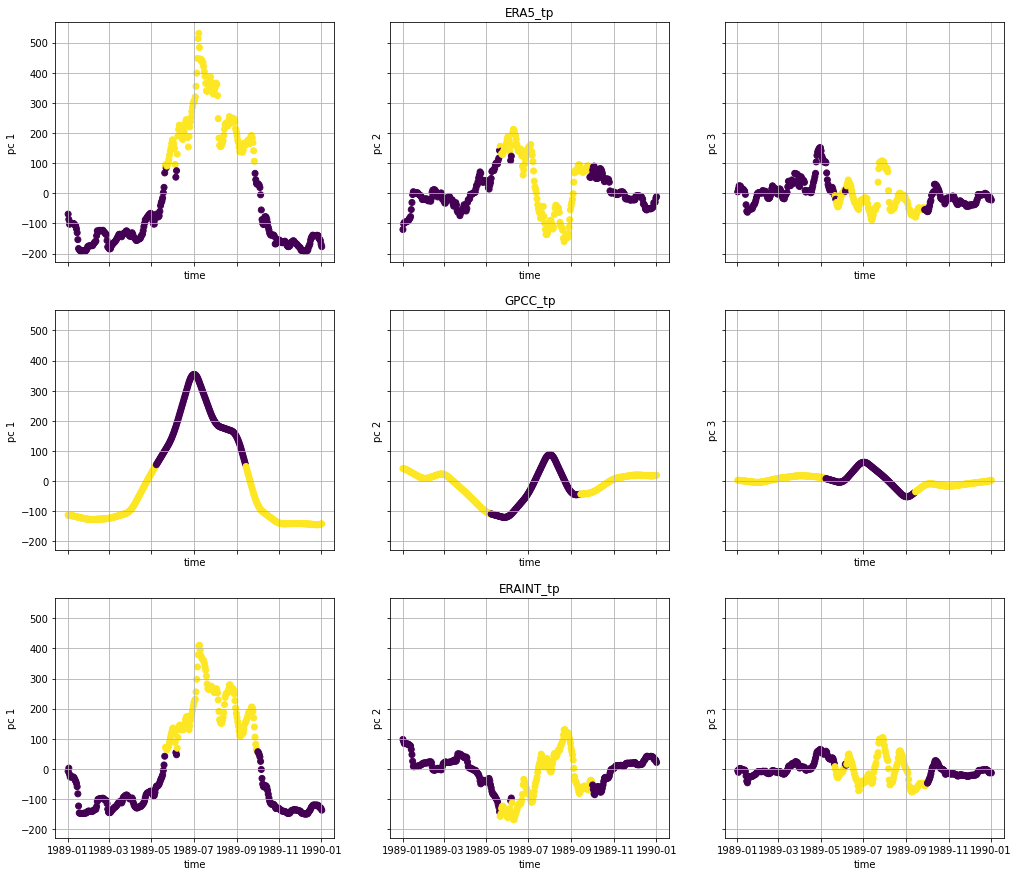

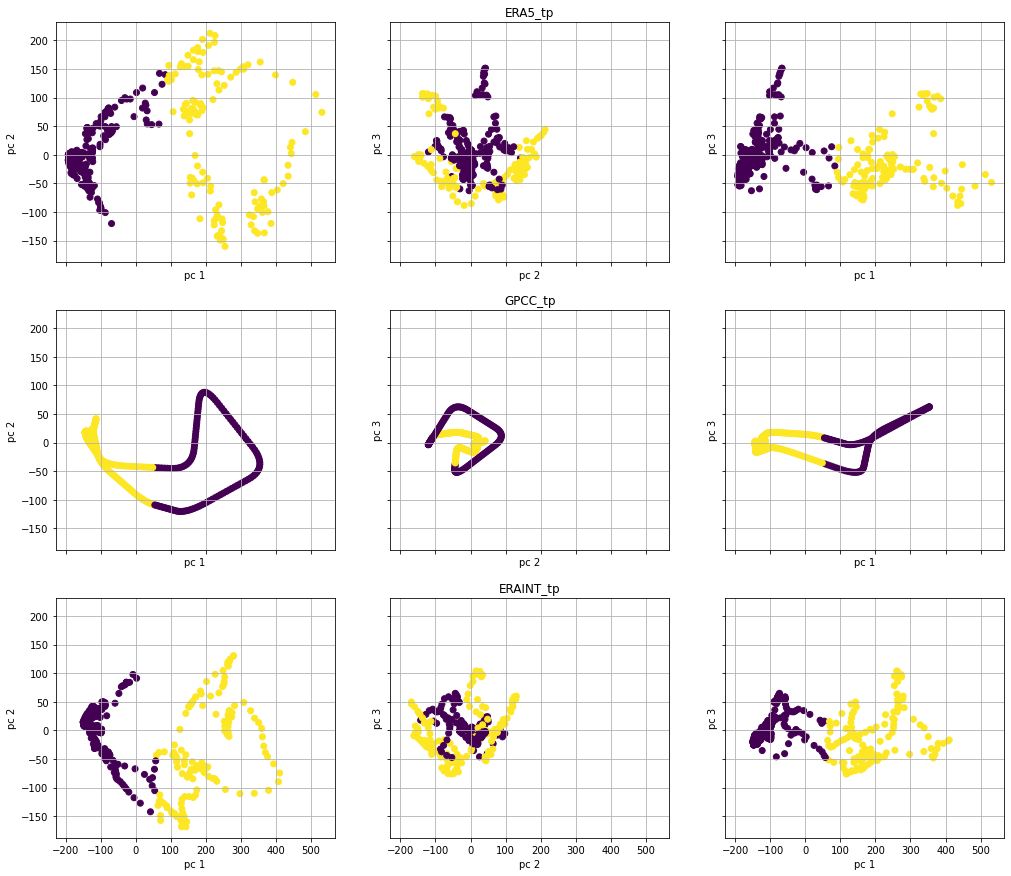

In [24]:
plot_set = predict_database.sel(time = slice('1989-01-01','1990-01-01'))

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 0), c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,0].set_xlabel('time')
    axs[i,0].set_ylabel('pc 1')
    axs[i,0].grid() 
    axs[i,1].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 1),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,1].set_xlabel('time')
    axs[i,1].set_ylabel('pc 2')
    axs[i,1].grid()  
    axs[i,2].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,2].set_xlabel('time')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 1), c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 1) , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()

ERA5_tp
3128
7786

GPCC_tp
3563
7351

ERAINT_tp
7535
3379



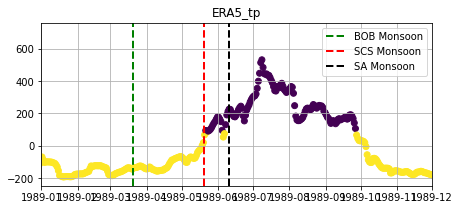

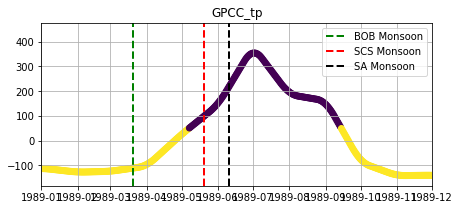

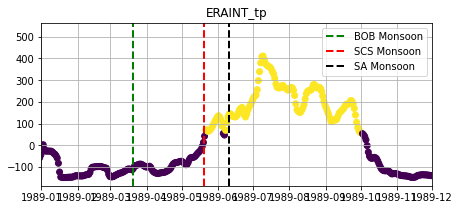

In [12]:
for i in range(len(dataset_names)):

    plt.figure(figsize = (7,3))

    plt.scatter(getattr(pc_database, dataset_names[i]).time, getattr(pc_database, dataset_names[i]).sel(mode=0), c = prediction_daily[i])
    plt.title(dataset_names[i])
    plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1989-12-01'))
    plt.axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    plt.grid()
    plt.legend()

    print(dataset_names[i])

    for j in range(n_season):
        print(np.count_nonzero(prediction_daily[i] == j))
    
    print()

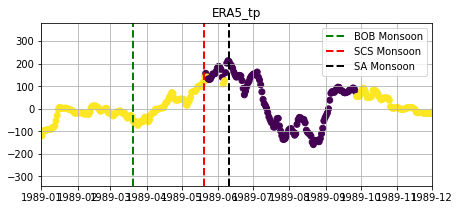

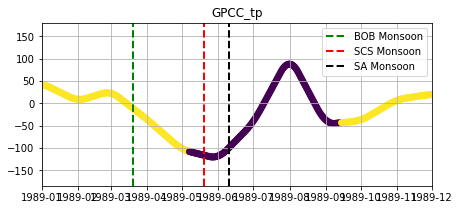

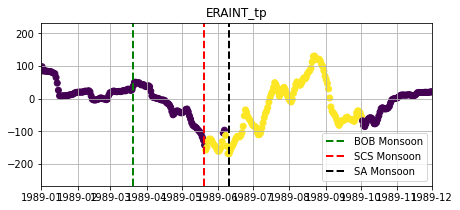

In [13]:
for i in range(len(dataset_names)):

    plt.figure(figsize = (7,3))

    plt.scatter(getattr(pc_database, dataset_names[i]).time, getattr(pc_database, dataset_names[i]).sel(mode=1), c = prediction_daily[i])
    plt.title(dataset_names[i])
    plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1989-12-01'))
    plt.axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    plt.grid()
    plt.legend()


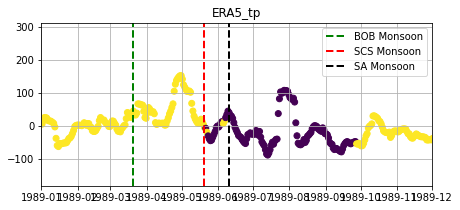

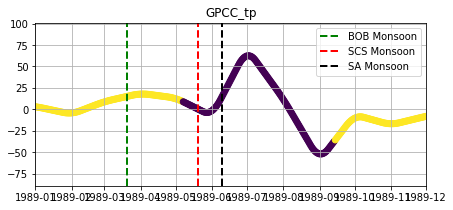

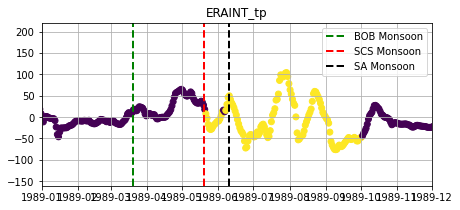

In [14]:
for i in range(len(dataset_names)):

    plt.figure(figsize = (7,3))

    plt.scatter(getattr(pc_database, dataset_names[i]).time, getattr(pc_database, dataset_names[i]).sel(mode=2), c = prediction_daily[i])
    plt.title(dataset_names[i])
    plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1989-12-01'))
    plt.axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    plt.grid()
    plt.legend()


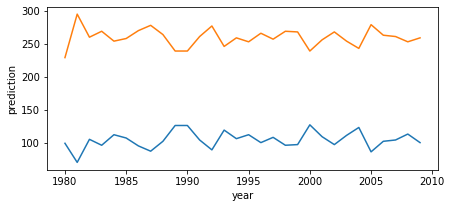

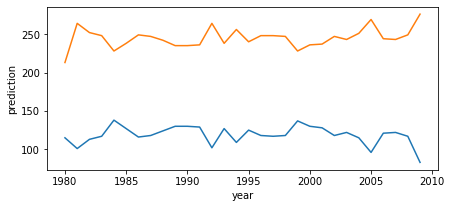

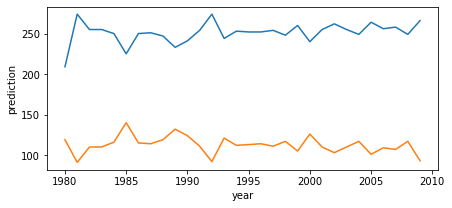

In [15]:
plt.figure(figsize = (7,3))
p_d = xr.DataArray(prediction_daily[0], dims=['time']).rename('prediction')
new = xr.merge([pc_database.ERA5_tp,p_d])
evol = new.groupby('prediction')
for i in range(n_season):
    evol[i].groupby('time.year').count().prediction.plot()



plt.figure(figsize = (7,3))
p_d = xr.DataArray(prediction_daily[1], dims=['time']).rename('prediction')
new2 = xr.merge([pc_database.GPCC_tp,p_d])
evol2 = new2.groupby('prediction')
for i in range(n_season):
    evol2[i].groupby('time.year').count().prediction.plot()

plt.figure(figsize = (7,3))
p_d = xr.DataArray(prediction_daily[2], dims=['time']).rename('prediction')
new3 = xr.merge([pc_database.ERAINT_tp,p_d])
evol3 = new3.groupby('prediction')
for i in range(n_season):
    evol3[i].groupby('time.year').count().prediction.plot()    


<Figure size 504x216 with 0 Axes>

<Figure size 504x216 with 0 Axes>

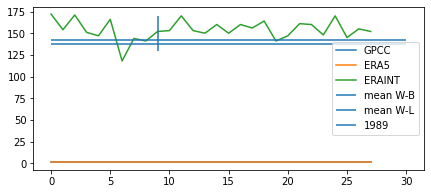

In [16]:
plt.figure(figsize = (7,3))
p_d = xr.DataArray(prediction_daily[0], dims=['time']).rename('prediction')
new = xr.merge([pc_database.ERA5_tp,p_d])
onse = new.groupby('time.year') 
onset_date_ERA5 = []

for i in np.arange(1981,2009,1):
    
    itemindex = np.where(onse[i].prediction == 1)
    onset = np.squeeze(itemindex[0][0])
    onset_date_ERA5.append(onse[i].time[onset]['time.dayofyear'].to_numpy())
   

onset_date_ERA5 = np.squeeze(onset_date_ERA5)



plt.figure(figsize = (7,3))
p_d = xr.DataArray(prediction_daily[1], dims=['time']).rename('prediction')
new = xr.merge([pc_database.GPCC_tp,p_d])
onse = new.groupby('time.year') 
onset_date_GPCC = []

for i in np.arange(1981,2009,1):
    
    itemindex = np.where(onse[i].prediction == 1)
    onset = np.squeeze(itemindex[0][0])
    onset_date_GPCC.append(onse[i].time[onset]['time.dayofyear'].to_numpy())
   

onset_date_GPCC = np.squeeze(onset_date_GPCC)


plt.figure(figsize = (7,3))
p_d = xr.DataArray(prediction_daily[2], dims=['time']).rename('prediction')
new = xr.merge([pc_database.ERAINT_tp,p_d])
onse = new.groupby('time.year') 
onset_date_ERAINT = []

for i in np.arange(1981,2009,1):
    
    itemindex = np.where(onse[i].prediction == 1)
    onset = np.squeeze(itemindex[0][0])
    onset_date_ERAINT.append(onse[i].time[onset]['time.dayofyear'].to_numpy())
   

onset_date_ERAINT = np.squeeze(onset_date_ERAINT)

plt.plot(onset_date_GPCC, label = 'GPCC')
plt.plot(onset_date_ERA5, label = 'ERA5')
plt.plot(onset_date_ERAINT, label = 'ERAINT')
plt.hlines(138, xmin=0, xmax=30, label = 'mean W-B')
plt.hlines(142, xmin=0, xmax=30, label = 'mean W-L')
plt.vlines(9, ymin=130, ymax=170, label = '1989')
plt.legend()



In [17]:
ERA5_GPCC = np.corrcoef(onset_date_ERA5,onset_date_GPCC)
ERA5_ERAINT = np.corrcoef(onset_date_ERA5,onset_date_ERAINT)
ERAINT_GPCC = np.corrcoef(onset_date_ERAINT,onset_date_GPCC)

ERA5_ERAINT

/work/users/guest/jacopo/env/general/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/work/users/guest/jacopo/env/general/lib/python3.8/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])